# Losses can have non optimal local minimas

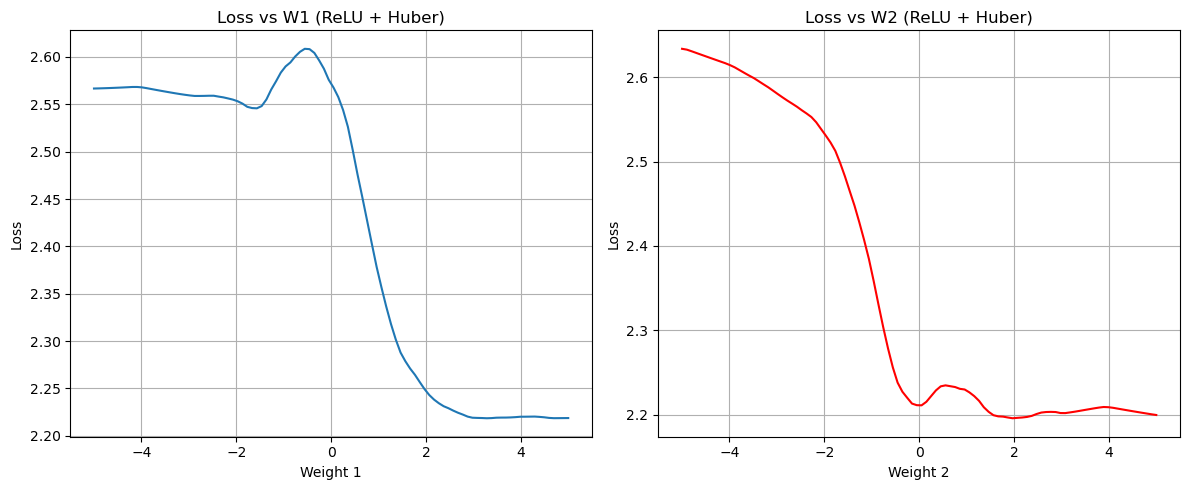

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset: y = 4 + 2*x1 + 3*x2 + noise
np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1  
y = 4 + 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 0.5  

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = 0.5 * (error ** 2)
    linear = delta * (abs_error - 0.5 * delta)
    return np.mean(np.where(abs_error < delta, quadratic, linear))

# Loss function with non-linearity
def compute_loss(w1, w2, X, y):
    b1, b2 = 0.5, -0.5  
    W_out = np.array([[2.0], [-2.0]])  
    b_out = 0.3  

    hidden_input = np.dot(X, np.array([[w1, w2]]).T) + np.array([[b1, b2]])
    hidden_output = relu(hidden_input)  
    final_output = np.dot(hidden_output, W_out) + b_out  

    return huber_loss(y, final_output.flatten(), delta=1.0)

# Generate weight range
w_values = np.linspace(-5, 5, 100)
loss_w1 = np.zeros(100)
loss_w2 = np.zeros(100)

fixed_w1, fixed_w2 = 1.0, -1.0  

# Compute loss for individual weights
for i, w in enumerate(w_values):
    loss_w1[i] = compute_loss(w, fixed_w2, X, y)
    loss_w2[i] = compute_loss(fixed_w1, w, X, y)

# Plot Loss vs W1 and W2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(w_values, loss_w1, label="Loss w.r.t W1")
axes[0].set_xlabel("Weight 1")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs W1 (ReLU + Huber)")
axes[0].grid()

axes[1].plot(w_values, loss_w2, label="Loss w.r.t W2", color='r')
axes[1].set_xlabel("Weight 2")
axes[1].set_ylabel("Loss")
axes[1].set_title("Loss vs W2 (ReLU + Huber)")
axes[1].grid()

plt.tight_layout()
plt.show()

